<a href="https://colab.research.google.com/github/waterbean0403/TIL/blob/main/05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
"""# 결정 트리"""

"""## 로지스틱 회귀로 와인 분류하기"""

import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [25]:
wine.head()     # head() 메서드로 처음 5개의 샘플 확인

# 네 번째 열은 타깃값으로 0이면 레드 와인, 1이면 화이트 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [26]:
wine.info()     # info() 메서드는 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는 데 유용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [27]:
wine.describe()     # describe() 메서드는 열에 대한 간략한 통계 출력

# 알코올 도수와 당도, pH 값의 스케일이 다르므로 특성 표준화 필요

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [28]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()     # 처음 3개의 열을 넘파이 배열로 바꿔서 data 배열에 저장
target = wine['class'].to_numpy()     # 마지막 class 열을 넘파이 배열로 바꿔서 target 배열에 저장

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)     # 샘플 개수가 충분히 많으므로 20% 정도만 테스트 세트로 나눔. 코드의 test_size=0.2가 이런 의미

In [30]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [31]:
# StandardScaler 클래스를 사용해 훈련 세트를 전처리한 후, 같은 객체를 그대로 사용해 테스트 세트 변환

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [32]:
# 표준점수로 변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델 훈련

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 모델이 과소적합되어, 훈련 세트와 테스트 세트의 점수가 모두 낮음
# 문제를 해결하기 위해 규제 매개변수 C의 값을 바꾸거나 solver 매개변수에서 다른 알고리즘을 선택하거나 또는 다항 특성을 만들어 추가할 수 있음

0.7808350971714451
0.7776923076923077


In [33]:
"""### 설명하기 쉬운 모델과 어려운 모델"""

print(lr.coef_, lr.intercept_)     # 로지스틱 회귀가 학습한 계수와 절편 출력

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [34]:
"""## 결정 트리"""

from sklearn.tree import DecisionTreeClassifier     # 사이킷런의 DecisionTreeClassifier 클래스를 사용해 결정 트리 모델 훈련

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))     # 훈련 세트
print(dt.score(test_scaled, test_target))     # 테스트 세트

# 테스트 세트의 성능이 훈련 세트보다 낮은 과대적합된 모델

0.996921300750433
0.8592307692307692


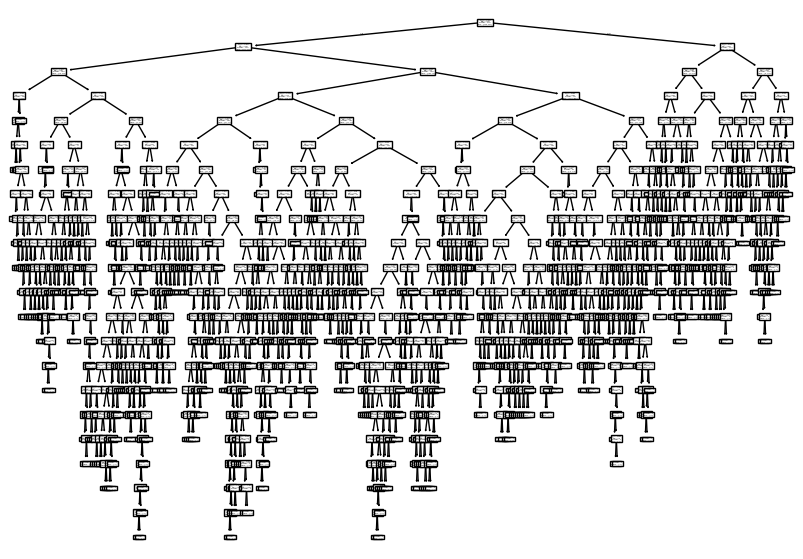

In [35]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

# 사이킷런은 plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력

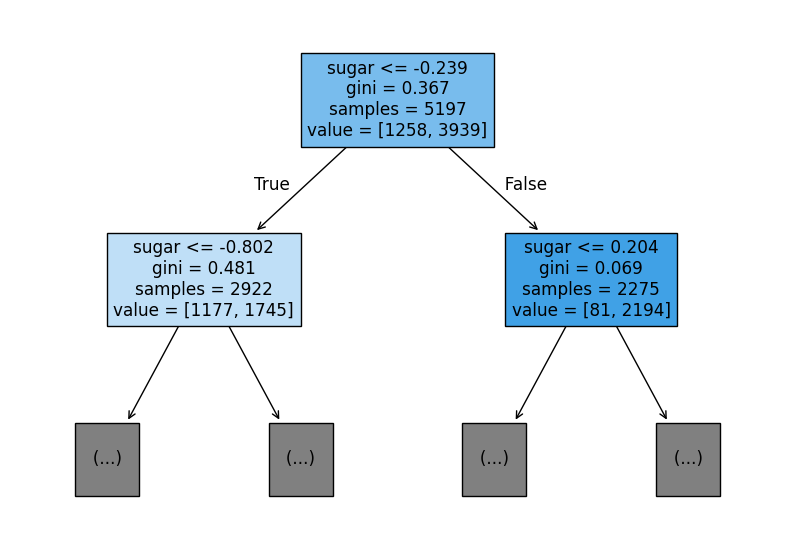

In [36]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그림. 또 filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있음. feature_names 매개변수에는 특성의 이름을 전달할 수 있음

In [37]:
"""### 가지치기"""

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로임

0.8454877814123533
0.8415384615384616


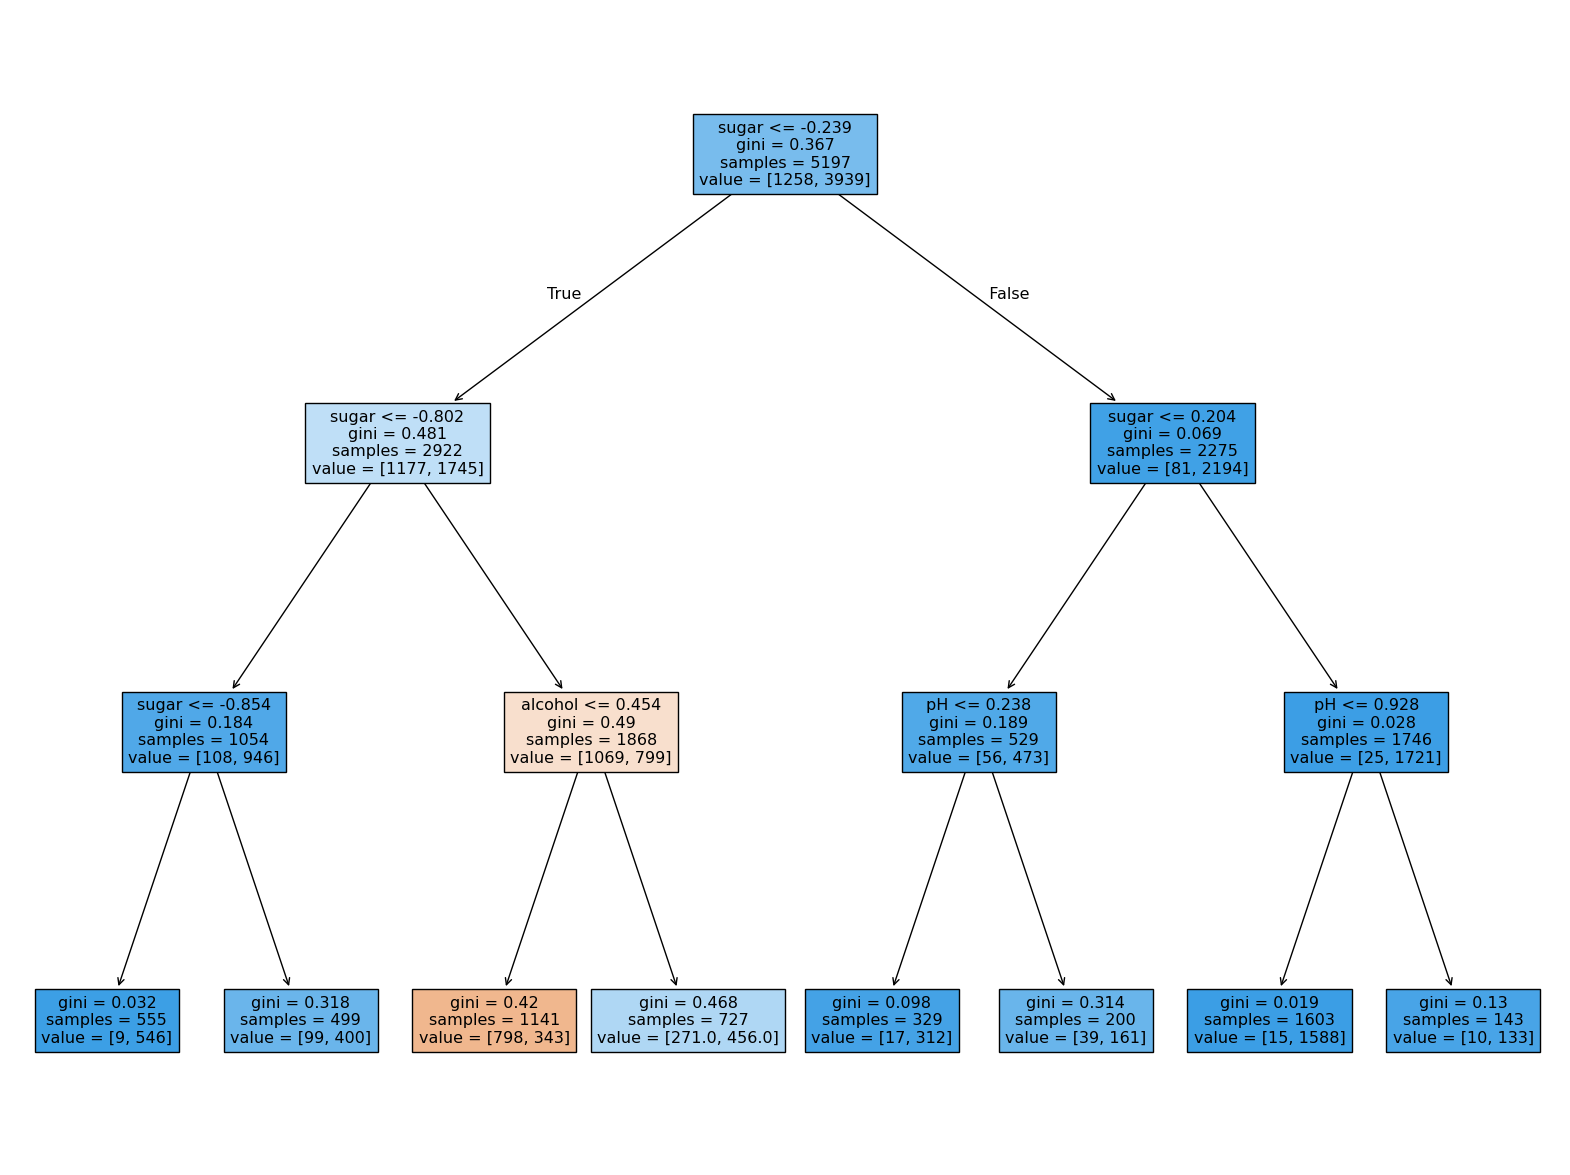

In [38]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [39]:
# 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델을 다시 훈련

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# 결과가 정확히 같음. 즉, 결정 트리 알고리즘은 표준화 전처리를 할 필요가 없음

0.8454877814123533
0.8415384615384616


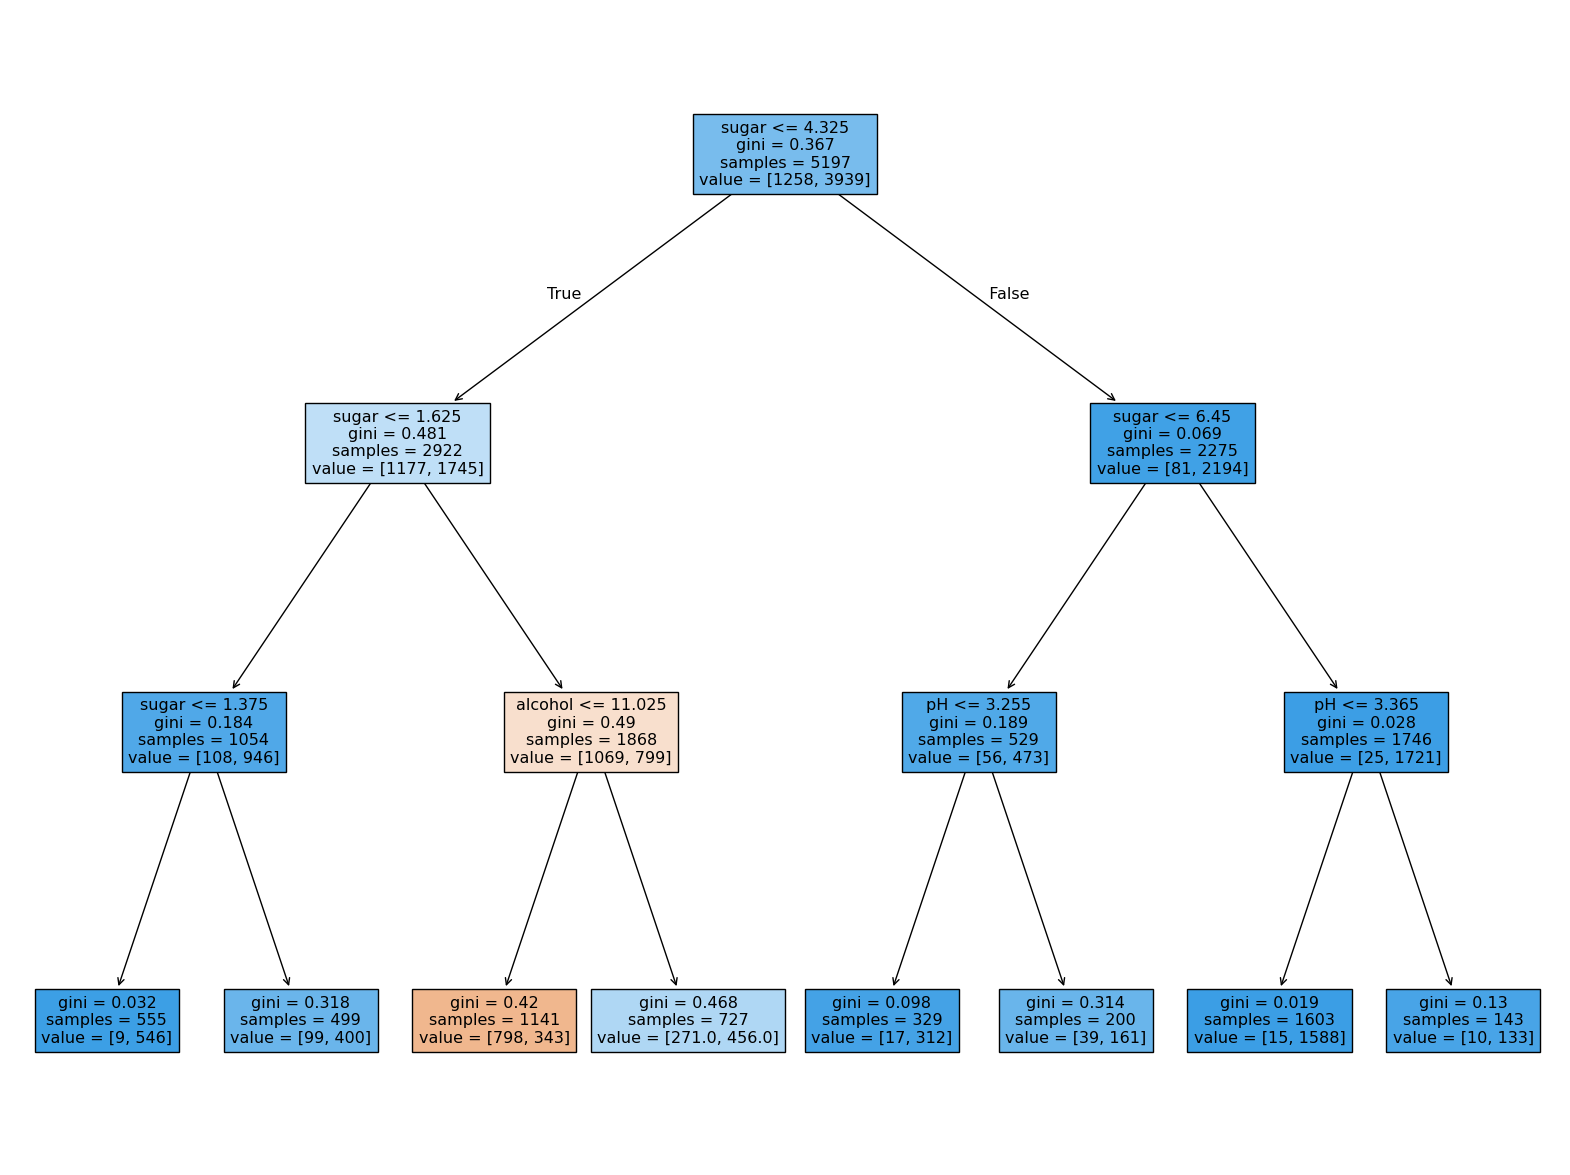

In [40]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않은 터라 이해하기 훨씬 쉬움

In [41]:
print(dt.feature_importances_)

# 특성 중요도는 결정 트리 모델의 feature_importances_ 속성에 저장되어 있음
# 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있음

[0.12345626 0.86862934 0.0079144 ]
